# Player Data
#### Import the nba api

In [1]:
%matplotlib inline
from nba_api.stats.static import players
from nba_api.stats.endpoints import playergamelogs
from nba_api.stats.endpoints import playercareerstats
from nba_api.stats.endpoints import playerfantasyprofilebargraph
from pylab import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Specify the players on the team

In [2]:
myTeam = ['D\'Angelo Russell',
          'Buddy Hield',
          'Ja Morant',
          'Bojan Bogdanovic',
          'DeMar DeRozan',
          'Domantas Sabonis',
          'Jakob Poeltl',
          'Christian Wood',
          'Nikola Vucevic',
          'Cade Cunningham',
          'Montrezl Harrell',
          'Stephen Curry',
          'Kyle Lowry',
          'Aaron Gordon',
          'Wendell Carter Jr.']

#### Load all nba players and get a list with their ids

In [3]:

allPlayers = players.get_players()
myPlayers = [person for person in allPlayers if person['full_name'] in myTeam]
df = pd.DataFrame(myPlayers)
#only want id and name
df.loc[:,['id','full_name']]

,id,full_name
0,202711,Bojan Bogdanovic
1,1628976,Wendell Carter Jr.
2,1630595,Cade Cunningham
3,201939,Stephen Curry
4,201942,DeMar DeRozan
5,203932,Aaron Gordon
6,1626149,Montrezl Harrell
7,1627741,Buddy Hield
8,200768,Kyle Lowry
9,1629630,Ja Morant


### Show Fantasy Points For Players this Season
#### Don't send too many requests or else the data will not load

Loaded:  Bojan Bogdanovic 202711
Loaded:  Wendell Carter Jr. 1628976
Loaded:  Cade Cunningham 1630595
Loaded:  Stephen Curry 201939
Loaded:  DeMar DeRozan 201942
Loaded:  Aaron Gordon 203932
Loaded:  Montrezl Harrell 1626149
Loaded:  Buddy Hield 1627741
Loaded:  Kyle Lowry 200768
Loaded:  Ja Morant 1629630
Loaded:  Jakob Poeltl 1627751
Loaded:  D'Angelo Russell 1626156
Loaded:  Domantas Sabonis 1627734
Loaded:  Nikola Vucevic 202696
Loaded:  Christian Wood 1626174


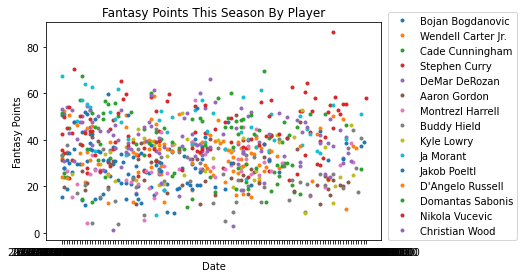

In [4]:

plt.xlabel('Date')
plt.ylabel('Fantasy Points')
plt.title('Fantasy Points This Season By Player')


#lists to hold average values
means = []
medians = []
names = []


#iterate through each row of df
for index, row in df.iterrows(): 
    playerID = row['id']
    playerNAME = row['full_name']
    
    print("Loaded: ",playerNAME, playerID)
    
    #get data for this season
    playerStats = playergamelogs.PlayerGameLogs(player_id_nullable = playerID, season_nullable = '2021-22')

    #have to index zero since get_data_frames since will throw error due to not a 2d arrray
    stats = pd.DataFrame(playerStats.get_data_frames()[0])

    fantasyPoints = stats.loc[:,['GAME_DATE', 'NBA_FANTASY_PTS']]
    
    #plot the players data
    plt.plot(fantasyPoints['GAME_DATE'], fantasyPoints['NBA_FANTASY_PTS'], linestyle = 'None', marker = '.', label = playerNAME)
    
    
    #get averages for the player
    means.append(fantasyPoints['NBA_FANTASY_PTS'].mean())
    medians.append(fantasyPoints['NBA_FANTASY_PTS'].median())
    names.append(playerNAME)
    

plt.legend(loc=(1.02, 0))


#create data frame with data about each player
avgDF = pd.DataFrame(columns = ['Names', 'Mean', 'Median'])
avgDF['Names'] = names
avgDF['Mean'] = means
avgDF['Median'] = medians


In [5]:
#order the players based on their mean points
avgDF.sort_values(by='Mean', inplace = True, ascending = False)
avgDF

,Names,Mean,Median
9,Ja Morant,45.539130,46.60
3,Stephen Curry,43.688889,41.60
4,DeMar DeRozan,43.252727,43.00
13,Nikola Vucevic,42.159615,41.25
12,Domantas Sabonis,42.031373,44.70
14,Christian Wood,36.388889,36.65
11,D'Angelo Russell,35.108889,35.50
10,Jakob Poeltl,34.261224,34.20
1,Wendell Carter Jr.,32.598039,33.90
2,Cade Cunningham,32.356818,31.05


<AxesSubplot:>

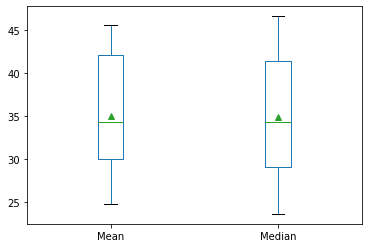

In [6]:
avgDF.boxplot(column=['Mean', 'Median'],showmeans = True, grid=False)


##### Take worst player on team and compare first 5 games, to last 5 games

Text(0.5, 1.0, 'BLK')

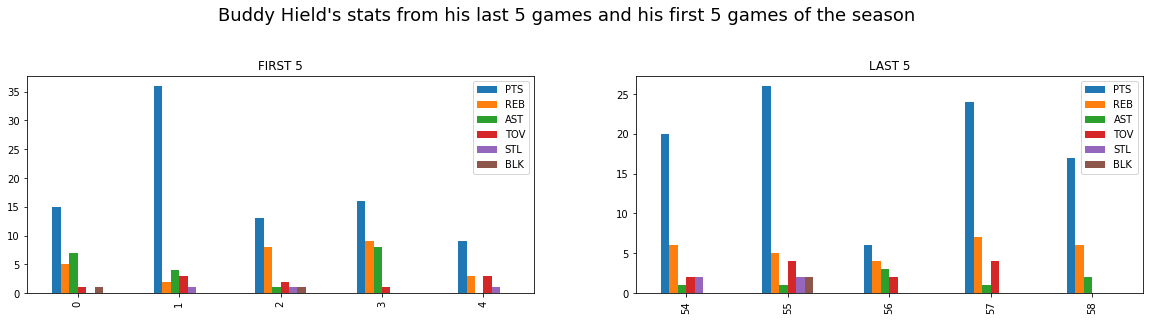

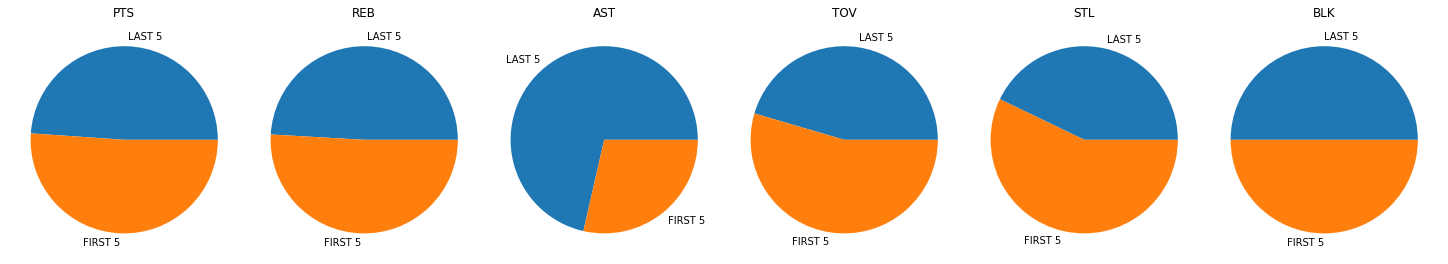

In [7]:
#get last index of sorted dataframe and get name 
worstPlayer = avgDF.iloc[-1][0]


#get the players id and then get their stats for the first 5 games and last 5
worstPlayerID = [p for p in allPlayers if p['full_name'] is worstPlayer]
worstStats = playergamelogs.PlayerGameLogs(player_id_nullable = worstPlayerID[0]['id'], season_nullable = '2021-22').get_data_frames()[0]

fig, (graph1, graph2) = plt.subplots(1,2,figsize=(20,4))

fig.suptitle("{}'s stats from his last 5 games and his first 5 games of the season".format(worstPlayer), fontsize = "18", y = 1.12)


#graph data in these columns
worstStats[["GAME_DATE","PTS","REB", "AST","TOV", "STL", "BLK"]].head().plot.bar(ax = graph1, title = "FIRST 5")


worstStats[["GAME_DATE","PTS","REB", "AST","TOV", "STL", "BLK"]].tail().plot.bar(ax = graph2, title = "LAST 5")




#print out table to verify
#worstStats[["GAME_DATE","MIN","PTS","REB", "AST","TOV", "STL", "BLK", "FG_PCT"]]

#compare the average differences between most recent and oldest this season
averageDF = pd.DataFrame(worstStats[["PTS","REB", "AST","TOV", "STL", "BLK"]])

fig, (PTS,REB, AST,TOV, STL, BLK) = plt.subplots(1,6,figsize=(20,4), constrained_layout = True)
new = []
old = []

#calculate the averages over last 5 and first 5 in each category
for col in averageDF.columns:
    new.append(averageDF[col].head().mean())
    old.append(averageDF[col].tail().mean())
    


#print each pie graph
PTS.pie([new[0], old[0]], labels = ["LAST 5", "FIRST 5"])
PTS.set_title("PTS")

REB.pie([new[1], old[1]], labels = ["LAST 5", "FIRST 5"])
REB.set_title("REB")

AST.pie([new[2], old[2]], labels = ["LAST 5", "FIRST 5"])
AST.set_title("AST")

TOV.pie([new[3], old[3]], labels = ["LAST 5", "FIRST 5"])
TOV.set_title("TOV")

STL.pie([new[4], old[4]], labels = ["LAST 5", "FIRST 5"])
STL.set_title("STL")

BLK.pie([new[5], old[5]], labels = ["LAST 5", "FIRST 5"], normalize = True)
BLK.set_title("BLK")


## To compare two players




In [8]:
playersToCompare = ["Kyle Lowry", "Stephen Curry"]
comparePlayers = [p for p in allPlayers if p['full_name'] in playersToCompare]

#### Get Player Career History

In [9]:
#only want main stats (PTS, STL, BLK, REB, etc.) which explains index [0] at end
player1Career = playercareerstats.PlayerCareerStats(player_id = comparePlayers[0]['id']).get_data_frames()[0]
player2Career = playercareerstats.PlayerCareerStats(player_id = comparePlayers[1]['id']).get_data_frames()[0]


player1Career[4:]

,PLAYER_ID,SEASON_ID,LEAGUE_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_AGE,GP,GS,MIN,FGM,...,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS
4,201939,2013-14,00,1610612744,GSW,26.0,78,78,2846.0,652,...,0.885,46,288,334,666,128,14,294,194,1873
5,201939,2014-15,00,1610612744,GSW,27.0,80,80,2613.0,653,...,0.914,56,285,341,619,163,16,249,158,1900
6,201939,2015-16,00,1610612744,GSW,28.0,79,79,2700.0,805,...,0.908,68,362,430,527,169,15,262,161,2375
7,201939,2016-17,00,1610612744,GSW,29.0,79,79,2639.0,675,...,0.898,61,292,353,524,142,17,239,183,1999
8,201939,2017-18,00,1610612744,GSW,30.0,51,51,1631.0,428,...,0.921,36,225,261,310,80,8,153,114,1346
9,201939,2018-19,00,1610612744,GSW,31.0,69,69,2331.0,632,...,0.916,45,324,369,361,92,25,192,166,1881
10,201939,2019-20,00,1610612744,GSW,32.0,5,5,139.0,33,...,1.000,4,22,26,33,5,2,16,11,104
11,201939,2020-21,00,1610612744,GSW,33.0,63,63,2152.0,658,...,0.916,29,316,345,363,77,8,213,119,2015
12,201939,2021-22,00,1610612744,GSW,33.0,54,54,1881.0,452,...,0.919,31,255,286,342,74,21,175,114,1393


## Points Prediction
### Based on average point from previous 5, and previous 10 games

In [52]:
#additional imports from tutorial
#regression modelling
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
#more info
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns
from seaborn import pairplot
from statsmodels.graphics.correlation import plot_corr
from nba_api.stats.endpoints import leaguegamelog

In [11]:
gameHistory = leaguegamelog.LeagueGameLog().get_data_frames()[0]
data = pd.DataFrame(gameHistory)
print(list(data.columns))
print(data.shape)
data.head()  # print top 5



['SEASON_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_NAME', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'VIDEO_AVAILABLE']
(1766, 29)


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,41,...,41,50,30,9,2,17,18,121,7,1
1,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,240,45,...,40,45,21,7,4,18,25,114,-7,1
2,22021,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,240,48,...,41,54,25,8,9,8,19,127,23,1
3,22021,1610612751,BKN,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,240,37,...,39,44,19,3,9,13,17,104,-23,1
4,22021,1610612754,IND,Indiana Pacers,0022100003,2021-10-20,IND @ CHA,L,240,42,...,43,51,29,2,10,17,24,122,-1,1


In [12]:
data.isna().sum() # used to see if any of the data is empty


SEASON_ID            0
TEAM_ID              0
TEAM_ABBREVIATION    0
TEAM_NAME            0
GAME_ID              0
GAME_DATE            0
MATCHUP              0
WL                   0
MIN                  0
FGM                  0
FGA                  0
FG_PCT               0
FG3M                 0
FG3A                 0
FG3_PCT              0
FTM                  0
FTA                  0
FT_PCT               0
OREB                 0
DREB                 0
REB                  0
AST                  0
STL                  0
BLK                  0
TOV                  0
PF                   0
PTS                  0
PLUS_MINUS           0
VIDEO_AVAILABLE      0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1766 entries, 0 to 1765
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SEASON_ID          1766 non-null   object 
 1   TEAM_ID            1766 non-null   int64  
 2   TEAM_ABBREVIATION  1766 non-null   object 
 3   TEAM_NAME          1766 non-null   object 
 4   GAME_ID            1766 non-null   object 
 5   GAME_DATE          1766 non-null   object 
 6   MATCHUP            1766 non-null   object 
 7   WL                 1766 non-null   object 
 8   MIN                1766 non-null   int64  
 9   FGM                1766 non-null   int64  
 10  FGA                1766 non-null   int64  
 11  FG_PCT             1766 non-null   float64
 12  FG3M               1766 non-null   int64  
 13  FG3A               1766 non-null   int64  
 14  FG3_PCT            1766 non-null   float64
 15  FTM                1766 non-null   int64  
 16  FTA                1766 

In [14]:
data.describe() # use to see if the data makes sense, curious on the minutes section

,TEAM_ID,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
count,1.766000e+03,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,...,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000,1766.000000
mean,1.610613e+09,241.302378,40.224802,88.152888,0.457213,12.325028,35.270668,0.349238,16.419592,21.261608,...,34.363533,44.764439,24.298414,7.638732,4.799547,13.900340,19.434315,109.194224,0.000000,1.001133
std,8.648285e+00,6.711562,5.174997,6.920951,0.054818,3.668211,6.577695,0.081338,5.522454,6.710405,...,5.339182,6.505957,4.936982,2.811300,2.373012,3.782954,3.911477,12.331823,14.933317,0.033643
min,1.610613e+09,240.000000,23.000000,67.000000,0.288000,2.000000,15.000000,0.077000,3.000000,5.000000,...,16.000000,25.000000,8.000000,0.000000,0.000000,2.000000,8.000000,75.000000,-73.000000,1.000000
25%,1.610613e+09,240.000000,37.000000,83.000000,0.418000,10.000000,31.000000,0.294000,13.000000,17.000000,...,31.000000,40.000000,21.000000,6.000000,3.000000,11.000000,17.000000,101.000000,-10.000000,1.000000
50%,1.610613e+09,240.000000,40.000000,88.000000,0.455000,12.000000,35.000000,0.345000,16.000000,21.000000,...,34.000000,45.000000,24.000000,7.000000,5.000000,14.000000,19.000000,109.000000,0.000000,1.000000
75%,1.610613e+09,240.000000,43.000000,92.750000,0.495000,15.000000,40.000000,0.400000,20.000000,26.000000,...,38.000000,49.000000,27.000000,9.000000,6.000000,16.000000,22.000000,117.000000,10.000000,1.000000
max,1.610613e+09,315.000000,60.000000,120.000000,0.687000,27.000000,57.000000,0.630000,35.000000,44.000000,...,54.000000,68.000000,41.000000,21.000000,14.000000,30.000000,33.000000,158.000000,73.000000,2.000000


## Indicate the teams 

In [15]:
home = "Golden State Warriors"
away = "Los Angeles Lakers"

In [16]:
homeGameHistory = data.loc[data["TEAM_NAME"] == home]
homeData = homeGameHistory.loc[:, homeGameHistory.columns != "VIDEO_AVAILABLE"] # get all columns but the video one

awayGameHistory = data.loc[data["TEAM_NAME"] == away]
awayData = awayGameHistory.loc[:, awayGameHistory.columns != "VIDEO_AVAILABLE"]


awayData.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS
1,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,240,45,...,5,40,45,21,7,4,18,25,114,-7
49,22021,1610612747,LAL,Los Angeles Lakers,0022100025,2021-10-22,LAL vs. PHX,L,240,34,...,12,34,46,25,7,3,16,26,105,-10
79,22021,1610612747,LAL,Los Angeles Lakers,0022100040,2021-10-24,LAL vs. MEM,W,240,45,...,9,27,36,29,10,12,17,14,121,3
103,22021,1610612747,LAL,Los Angeles Lakers,0022100053,2021-10-26,LAL @ SAS,W,265,50,...,9,47,56,20,8,10,13,21,125,4
118,22021,1610612747,LAL,Los Angeles Lakers,0022100061,2021-10-27,LAL @ OKC,L,240,46,...,10,30,40,29,8,2,17,22,115,-8


In [17]:
#add columns for point averages over last 10 and last 5 games
homeData["5_GAME_AVG"] = homeData["PTS"].shift(periods = 1).rolling(window = 5).mean()
homeData["10_GAME_AVG"] = homeData["PTS"].shift(periods = 1).rolling(window = 10).mean()
awayData["5_GAME_AVG"] = awayData["PTS"].shift(periods = 1).rolling(window = 5).mean()
awayData["10_GAME_AVG"] = awayData["PTS"].shift(periods = 1).rolling(window = 10).mean()


In [18]:
#populate empty cells with average points from season
homeAVG = homeData["PTS"].mean()
awayAVG = awayData["PTS"].mean()

homeData.fillna(homeAVG, inplace = True)
awayData.fillna(awayAVG, inplace = True)
homeData.head(12) # to verify it was added correctly

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,5_GAME_AVG,10_GAME_AVG
0,22021,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,41,...,50,30,9,2,17,18,121,7,110.610169,110.610169
30,22021,1610612744,GSW,Golden State Warriors,0022100016,2021-10-21,GSW vs. LAC,W,240,43,...,53,27,5,4,21,20,115,2,110.610169,110.610169
76,22021,1610612744,GSW,Golden State Warriors,0022100039,2021-10-24,GSW @ SAC,W,240,43,...,43,26,12,3,7,13,119,12,110.610169,110.610169
106,22021,1610612744,GSW,Golden State Warriors,0022100051,2021-10-26,GSW @ OKC,W,240,39,...,46,30,9,8,15,20,106,8,110.610169,110.610169
138,22021,1610612744,GSW,Golden State Warriors,0022100070,2021-10-28,GSW vs. MEM,L,265,39,...,48,29,8,7,23,17,101,-3,110.610169,110.610169
171,22021,1610612744,GSW,Golden State Warriors,0022100086,2021-10-30,GSW vs. OKC,W,240,39,...,56,30,9,8,16,21,103,21,112.400000,110.610169
233,22021,1610612744,GSW,Golden State Warriors,0022100117,2021-11-03,GSW vs. CHA,W,240,42,...,53,33,14,4,17,17,114,22,108.800000,110.610169
255,22021,1610612744,GSW,Golden State Warriors,0022100130,2021-11-05,GSW vs. NOP,W,240,47,...,49,36,10,4,11,16,126,41,108.600000,110.610169
281,22021,1610612744,GSW,Golden State Warriors,0022100145,2021-11-07,GSW vs. HOU,W,240,44,...,41,31,12,3,17,28,120,13,110.000000,110.610169
304,22021,1610612744,GSW,Golden State Warriors,0022100152,2021-11-08,GSW vs. ATL,W,240,44,...,39,31,13,4,14,22,127,14,112.800000,110.610169


In [41]:
colToFloat = ['MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS']

#convert dataframe to float
for column in homeData:
    if column in colToFloat:    
        homeData[column] = homeData[column].astype('float64')
        awayData[column] = awayData[column].astype('float64')


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,5_GAME_AVG,10_GAME_AVG
1,22021,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,240.0,45.0,...,45.0,21.0,7.0,4.0,18.0,25.0,114.0,-7.0,110.913793,110.913793
49,22021,1610612747,LAL,Los Angeles Lakers,0022100025,2021-10-22,LAL vs. PHX,L,240.0,34.0,...,46.0,25.0,7.0,3.0,16.0,26.0,105.0,-10.0,110.913793,110.913793
79,22021,1610612747,LAL,Los Angeles Lakers,0022100040,2021-10-24,LAL vs. MEM,W,240.0,45.0,...,36.0,29.0,10.0,12.0,17.0,14.0,121.0,3.0,110.913793,110.913793
103,22021,1610612747,LAL,Los Angeles Lakers,0022100053,2021-10-26,LAL @ SAS,W,265.0,50.0,...,56.0,20.0,8.0,10.0,13.0,21.0,125.0,4.0,110.913793,110.913793
118,22021,1610612747,LAL,Los Angeles Lakers,0022100061,2021-10-27,LAL @ OKC,L,240.0,46.0,...,40.0,29.0,8.0,2.0,17.0,22.0,115.0,-8.0,110.913793,110.913793


In [44]:
#filter to even less data -> this one is based only on points in last 5 and last 10 games
homeFinalData = homeData[['PTS', '5_GAME_AVG', '10_GAME_AVG']]
awayFinalData = awayData[['PTS', '5_GAME_AVG', '10_GAME_AVG']]

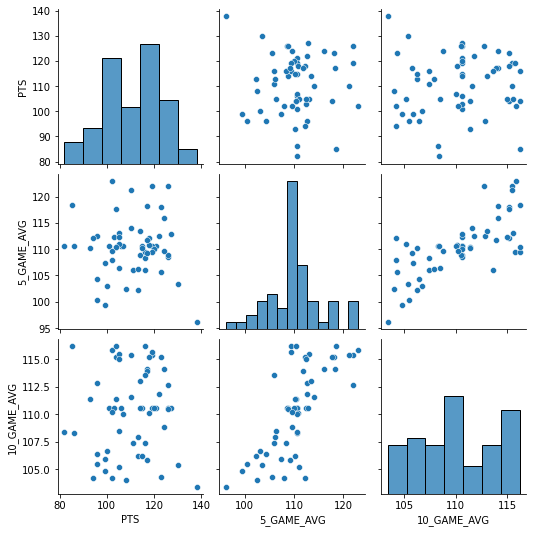

In [45]:
# see any correlation
pairplot(homeFinalData)

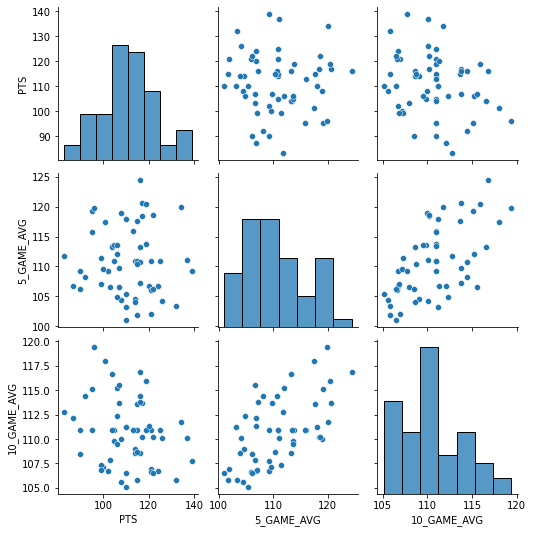

In [46]:
pairplot(awayFinalData)

In [48]:
homeCorrelation = homeFinalData.corr()
homeCorrelation

,PTS,5_GAME_AVG,10_GAME_AVG
PTS,1.000000,-0.023384,0.059672
5_GAME_AVG,-0.023384,1.000000,0.726976
10_GAME_AVG,0.059672,0.726976,1.000000


In [49]:
awayCorrelation = awayFinalData.corr()
awayCorrelation

,PTS,5_GAME_AVG,10_GAME_AVG
PTS,1.000000,-0.030486,-0.238343
5_GAME_AVG,-0.030486,1.000000,0.592164
10_GAME_AVG,-0.238343,0.592164,1.000000


#### Create training set for home team

In [50]:
X = pd.DataFrame(homeFinalData, columns = ["5_GAME_AVG", "10_GAME_AVG"])
Y = pd.DataFrame(homeFinalData, columns = ["PTS"])

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state =1)

In [56]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)
prediction = linear_regression.predict(X_test)

print(linear_regression.coef_)

[[-0.83160958  1.07348079]]


In [57]:
test_r2 = r2_score(Y_test, prediction)
print(test_r2)

-0.2602241973921031


In [59]:
RMS_error = (np.sqrt(mean_squared_error(Y_test, prediction)))
print(RMS_error)

13.662313388342602


In [61]:
results = Y_test

results['Predicted'] = prediction.ravel()
results["Residuals"] = abs(results["PTS"]) - abs(results["Predicted"])
print(results)

        PTS   Predicted  Residuals
1473  110.0  108.747891   1.252109
76    119.0  110.504342   8.495658
1097  115.0  106.111211   8.888789
1408  130.0  110.907371  19.092629
1209  108.0  110.236108  -2.236108
1064  123.0  107.897002  15.102998
1178   96.0  113.509548 -17.509548
607   105.0  113.728301  -8.728301
675   118.0  109.798820   8.201180
1557  126.0  103.275843  22.724157
1349  117.0  106.513428  10.486572
106   106.0  110.504342  -4.504342
1121   82.0  108.140225 -26.140225
1236   99.0  113.589721 -14.589721
730   104.0  111.526989  -7.526989


/var/folders/y3/lk9ztldx78dbm4yrgsq0gjt00000gn/T/ipykernel_74728/88657270.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Predicted'] = prediction.ravel()
/var/folders/y3/lk9ztldx78dbm4yrgsq0gjt00000gn/T/ipykernel_74728/88657270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results["Residuals"] = abs(results["PTS"]) - abs(results["Predicted"])
